### Remit2Any Inc - Week 4, 5, 6 & 7
Time Series Analysis and Forecasting of USD to INR exchange rate using ARIMA. Data used is from Jan, 2000 to Oct, 2023.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import tools
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
data_usdinr = pd.read_csv('/content/usdinr.csv',parse_dates=["Date"])
data_usdinr.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-10-13,83.26,83.25,83.30,83.21,NaN,0.0
1,2023-10-12,83.29,83.18,83.30,83.13,NaN,0.0
2,2023-10-11,83.16,83.22,83.25,83.12,NaN,0.0
3,2023-10-10,83.16,83.27,83.28,83.17,NaN,0.0
4,2023-10-09,83.25,83.19,83.35,83.16,NaN,0.0


In [3]:
# Dropping columns
df = data_usdinr.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1)

In [4]:
df.shape

(6203, 2)

In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6203 entries, 0 to 6202
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6203 non-null   datetime64[ns]
 1   Price   6203 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 97.0 KB


In [6]:
df.rename(columns={'Date':'date','Price':'price'}, inplace=True)

In [7]:
df['price'] = pd.to_numeric(df.price)

In [8]:
df = df.sort_values('date', ascending=True)

In [9]:
df.head()

,date,price
6202,2000-01-03,43.44
6201,2000-01-04,43.48
6200,2000-01-05,43.49
6199,2000-01-06,43.49
6198,2000-01-07,43.49


In [10]:
# Descriptive Stats of Price
df.price.describe()

count    6203.000000
mean       56.615899
std        12.646432
min        39.080000
25%        45.700000
50%        50.180000
75%        67.150000
max        83.310000
Name: price, dtype: float64

In [11]:
# Checking Null Values
df.isnull().sum()

date     0
price    0
dtype: int64

In [12]:
# Checking duplicates
df.duplicated().sum()

0

In [13]:
# ADF Fuller to check whethere the data is stationary or not
from statsmodels.tsa.stattools import adfuller

In [14]:
df1 = df.set_index('date')

In [15]:
new_df = df.copy()

In [16]:
import datetime as dt
new_df['year'] = new_df['date'].dt.year
new_df['month'] = new_df['date'].dt.month
new_df['day'] = new_df['date'].dt.day
new_df.set_index('date')

,price,year,month,day
date,,,,
2000-01-03,43.44,2000,1,3
2000-01-04,43.48,2000,1,4
2000-01-05,43.49,2000,1,5
2000-01-06,43.49,2000,1,6
2000-01-07,43.49,2000,1,7
...,...,...,...,...
2023-10-09,83.25,2023,10,9
2023-10-10,83.16,2023,10,10
2023-10-11,83.16,2023,10,11


# Data Visualization

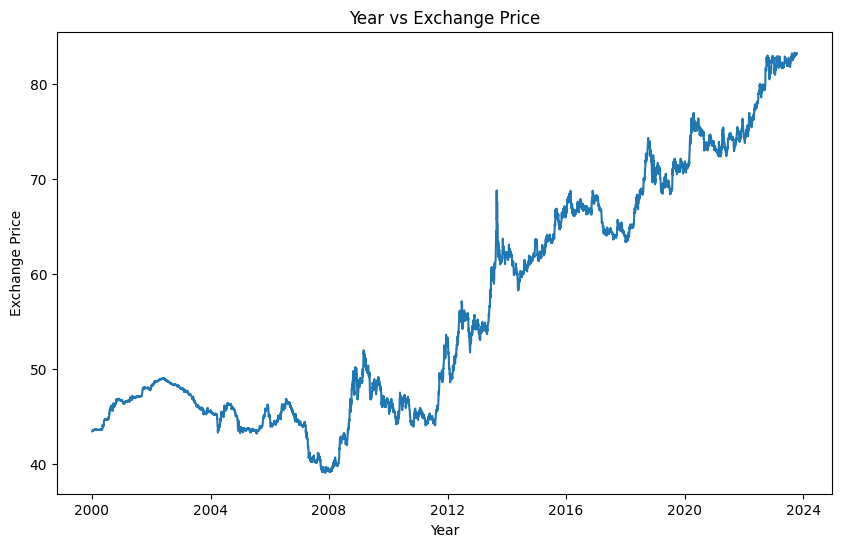

In [17]:
plt.figure(figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Exchange Price')
plt.title('Year vs Exchange Price')
plt.plot(df1)
plt.show()

# Stationarity

Using Rolling Statistics Visualization

In [18]:
#Determine rolling statistics
rolmean = df1.rolling(window=12).mean()
rolstd = df1.rolling(window=12).std()

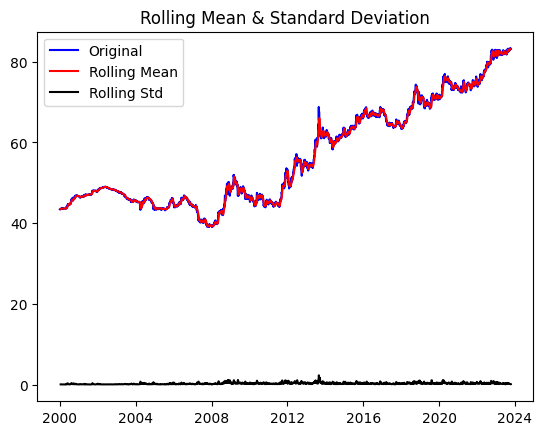

In [19]:
#Plot rolling statistics
orig = plt.plot(df1, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the ADF test.

### ADF Test

If the test statistic is more negative than the critical value, you can reject the null hypothesis and conclude that the time series is stationary.

In [20]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df1['price'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                    0.458696
p-value                           0.983562
#Lags Used                       25.000000
Number of Observations Used    6177.000000
Critical Value (1%)              -3.431409
Critical Value (5%)              -2.862008
Critical Value (10%)             -2.567019
dtype: float64


**For a Time series to be stationary, its ADF test should have:**

p-value to be low (according to the null hypothesis)
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
From the above ADF test result, we see that p-value(at max can be 1.0) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

**Data Transformation to achieve Stationarity**

There are a couple of ways to achieve stationarity through data transformation like taking  log10
 , loge
 , square, square root, cube, cube root, exponential decay, time shift and so on ...

In our notebook, lets start of with log transformations. Our objective is to remove the trend component. Hence, flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

**Log Scale Transformation**

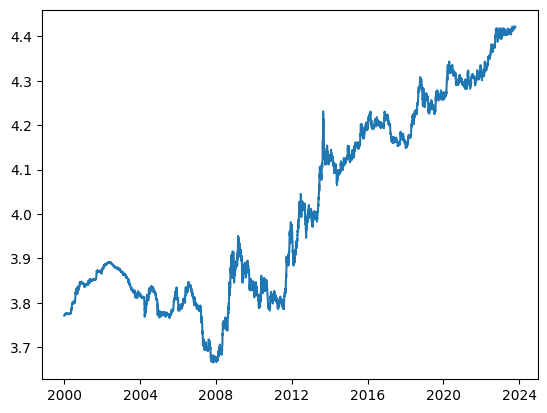

In [21]:
#Estimating trend
df1_logScale = np.log(df1)
plt.plot(df1_logScale)
plt.show()

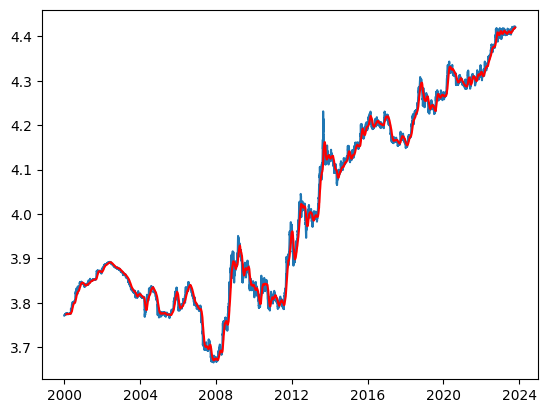

In [22]:
#The below transformation is required to make series stationary
movingAverage = df1_logScale.rolling(window=30).mean()
movingSTD = df1_logScale.rolling(window=30).std()
plt.plot(df1_logScale)
plt.plot(movingAverage, color='red')
plt.show()

From above graph, we see that even though rolling mean is not stationary, it is still better than the previous case, where no transfromation were applied to series. So we can atleast say that we are heading in the right direction.

We know from above graph that both the Time series with log scale as well as its moving average have a trend component. Thus we can apply a elementary intuition: subtraction one from the other should remove the trend component of both. Its like:

logscaleL=stationarypart(L1)+trend(LT)

movingavgoflogscaleA=stationarypart(A1)+trend(AT)

resultseriesR=L−A=(L1+LT)−(A1+AT)=(L1−A1)+(LT−AT)

Since, L & A are series & it moving avg, their trend will be more or less same, Hence
LT-AT nearly equals to 0

Thus trend component will be almost removed. And we have,

R=L1−A1
 , our final non-trend curve

In [23]:
datasetLogScaleMinusMovingAverage = df1_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,price
date,
2000-02-11,0.001286
2000-02-14,0.001377
2000-02-15,0.001491
2000-02-16,0.001384
2000-02-17,0.000169
2000-02-18,0.001430
2000-02-21,0.000429
2000-02-22,0.000375
2000-02-23,0.000321


In [24]:
def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=30).mean()
    movingSTD = timeseries.rolling(window=30).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['price'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

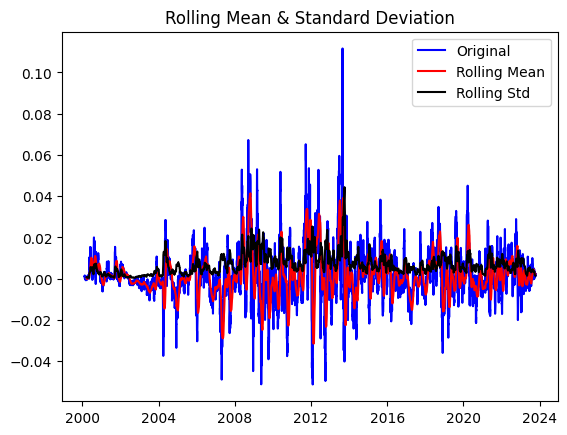

Results of Dickey Fuller Test:
Test Statistic                -1.070739e+01
p-value                        3.400061e-19
#Lags Used                     2.800000e+01
Number of Observations Used    6.145000e+03
Critical Value (1%)           -3.431415e+00
Critical Value (5%)           -2.862010e+00
Critical Value (10%)          -2.567020e+00
dtype: float64


In [25]:
test_stationarity(datasetLogScaleMinusMovingAverage)

From above graph, we observe that our intuition that "subtracting two related series having similar trend components will make the result stationary" is true. We find that:

p-value is almost close to zero.
The critical values are greater than the test statistic which means we can reject the null hypothesis and confirm that the series now stationary.
But, in the spirit of getting higher accuracy, let us explore & try to find a better scale than our current log.

**Let us try out Exponential decay.**

For further info, refer to my answer 12 at the top of the notebook on it.

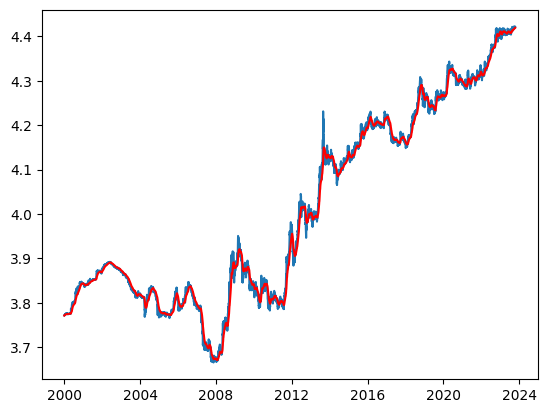

In [26]:
exponentialDecayWeightedAverage = df1_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df1_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')
plt.show()

From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are similar. But, in statistics, inferences cannot be drawn simply by looking at the curves. Hence, we perform the ADCF test again on the decay series below

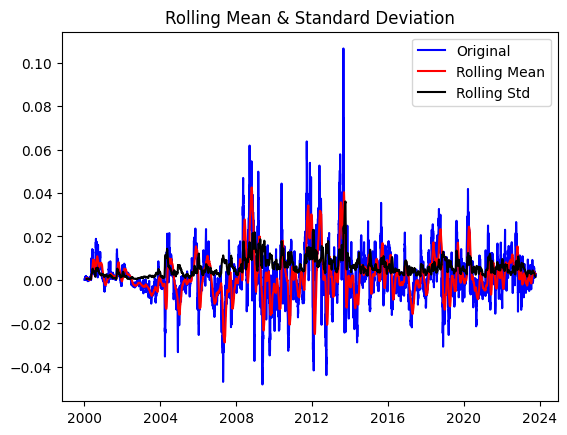

Results of Dickey Fuller Test:
Test Statistic                -9.946497e+00
p-value                        2.581257e-17
#Lags Used                     2.900000e+01
Number of Observations Used    6.173000e+03
Critical Value (1%)           -3.431410e+00
Critical Value (5%)           -2.862008e+00
Critical Value (10%)          -2.567019e+00
dtype: float64


In [27]:
datasetLogScaleMinusExponentialMovingAverage = df1_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

From above graph, we observe that our intuition that "subtracting two related series having similar trend components will make the result stationary" is true. We find that:

p-value is almost close to zero.
The critical values are greater than the test statistic which means we can reject the null hypothesis and confirm that the series now stationary. Thus exponential series also helped me in achieving stationarity.

Lets try Time Shift Transformation to see if we can better results.

**Time Shift Transformation**

Given a set of observation on the time series:
x0,x1,x2,x3,....xn

The shifted values will be:
null,x0,x1,x2,....xn
  <---- basically all xi's shifted by 1 pos to right

Thus, the time series with time shifted values are:
null,(x1−x0),(x2−x1),(x3−x2),(x4−x3),....(xn−xn−1)

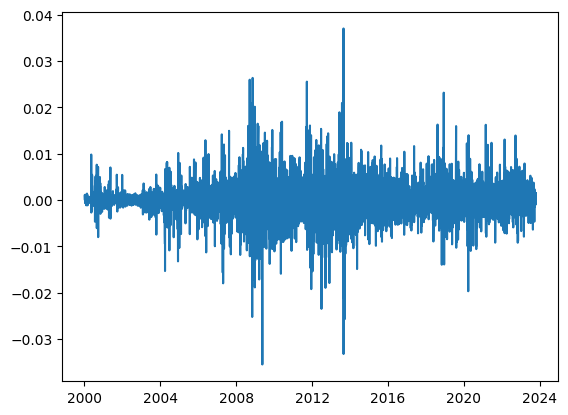

In [28]:
datasetLogDiffShifting = df1_logScale - df1_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.show()

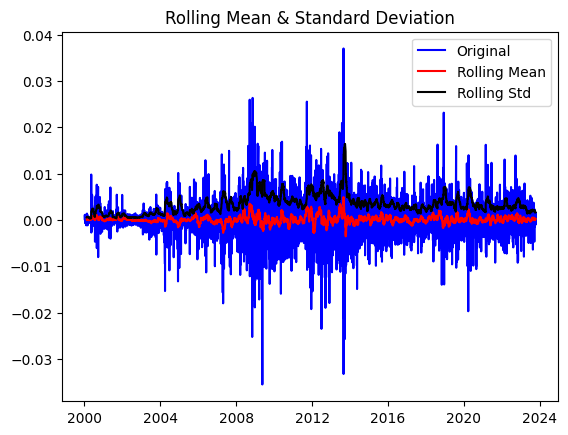

Results of Dickey Fuller Test:
Test Statistic                -1.393867e+01
p-value                        4.937414e-26
#Lags Used                     2.800000e+01
Number of Observations Used    6.173000e+03
Critical Value (1%)           -3.431410e+00
Critical Value (5%)           -2.862008e+00
Critical Value (10%)          -2.567019e+00
dtype: float64


In [29]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

The results of both log difference and time shift transformation are almost same. So lets proceed with log difference.

Let us now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part.

In [30]:
df1_logScale.index = pd.to_datetime(df1_logScale.index, errors='coerce')

In [31]:
df1_logScale.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6203 entries, 2000-01-03 to 2023-10-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   6203 non-null   float64
dtypes: float64(1)
memory usage: 96.9 KB


In [32]:
df1_logScale.head()

,price
date,
2000-01-03,3.771381
2000-01-04,3.772301
2000-01-05,3.772531
2000-01-06,3.772531
2000-01-07,3.772531


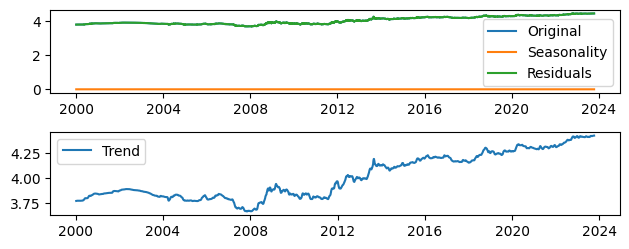

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df1_logScale, period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df1_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(df1_logScale, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

**Plotting AutoCorrelation Function(ACF) and Paritial Autocorrelation Function(PACF)**

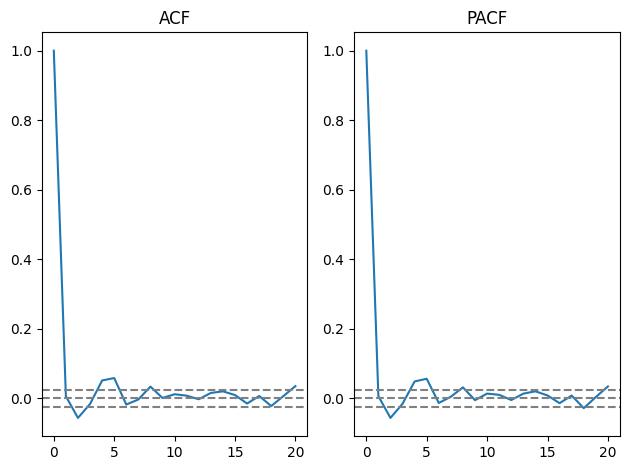

In [34]:
# ACF & PACF Plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('ACF')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('PACF')

plt.tight_layout()

The ACF and PACF graphs we have Q = 2 and P = 2. Let's build the ARIMA model.

In [35]:
datasetLogDiffShifting = datasetLogDiffShifting.asfreq('B', method='ffill')

In [36]:
datasetLogDiffShifting

,price
date,
2000-01-04,0.000920
2000-01-05,0.000230
2000-01-06,0.000000
2000-01-07,0.000000
2000-01-10,0.000000
...,...
2023-10-09,0.001563
2023-10-10,-0.001082
2023-10-11,0.000000


In [37]:
datasetLogDiffShifting.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6204 entries, 2000-01-04 to 2023-10-13
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   6204 non-null   float64
dtypes: float64(1)
memory usage: 96.9 KB


**Building our time series models.**

ARIMA Model

In [38]:
import statsmodels.api as smapi

model = smapi.tsa.arima.ARIMA(datasetLogDiffShifting, order=(2,1,2))

result = model.fit()

Plotting AR model


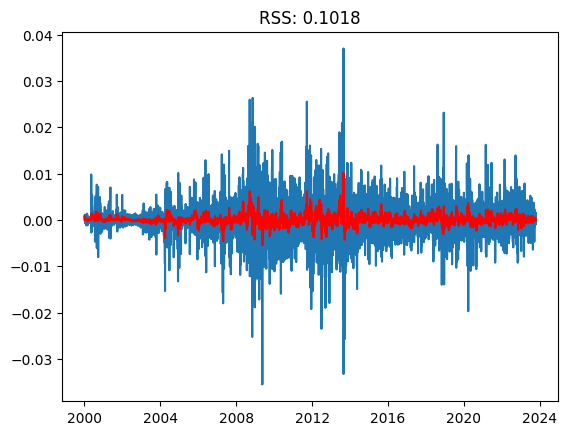

In [39]:
plt.plot(datasetLogDiffShifting)
plt.plot(result.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((result.fittedvalues - datasetLogDiffShifting['price'])**2))
print('Plotting AR model')

The RSS value for the ARIMA model is 0.1018, which is very good value.

Predictions and Inverse Transformations

In [40]:
predictions_ARIMA_diff = pd.Series(result.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2000-01-04    0.000000
2000-01-05    0.000920
2000-01-06    0.000551
2000-01-07    0.000374
2000-01-10    0.000273
Freq: B, dtype: float64


In [41]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

date
2000-01-04    0.000000
2000-01-05    0.000920
2000-01-06    0.001471
2000-01-07    0.001845
2000-01-10    0.002118
                ...   
2023-10-09    0.650998
2023-10-10    0.651253
2023-10-11    0.651218
2023-10-12    0.651315
2023-10-13    0.651554
Freq: B, Length: 6204, dtype: float64


In [42]:
predictions_ARIMA_log = pd.Series(df1_logScale['price'].iloc[0], index=df1_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2000-01-03    3.771381
2000-01-04    3.771381
2000-01-05    3.772301
2000-01-06    3.772852
2000-01-07    3.773226
dtype: float64

In [43]:
df1_logScale['price']

date
2000-01-03    3.771381
2000-01-04    3.772301
2000-01-05    3.772531
2000-01-06    3.772531
2000-01-07    3.772531
                ...   
2023-10-09    4.421848
2023-10-10    4.420766
2023-10-11    4.420766
2023-10-12    4.422328
2023-10-13    4.421968
Name: price, Length: 6203, dtype: float64

**Actual Values vs Predicted Values Comparison**

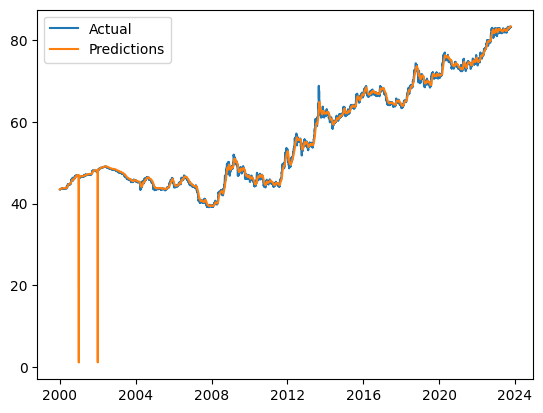

In [44]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df1, label='Actual')
plt.legend(loc='best')
plt.plot(predictions_ARIMA, label='Predictions')
plt.legend(loc='best')
plt.show()

**Forecasting for Future Dates**

In [45]:
# For the next 30 time periods

forecast_steps = 30
forecasts = pd.Series(result.get_forecast(steps=forecast_steps).predicted_mean, copy=True)

forecast_df = pd.DataFrame({'forecasted_value': forecasts})
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2023-10-16 to 2023-11-24
Freq: B
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   forecasted_value  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [46]:
forecast_cumsum = forecast_df.cumsum()
print(forecast_cumsum)

            forecasted_value
2023-10-16          0.000099
2023-10-17          0.000257
2023-10-18          0.000387
2023-10-19          0.000532
2023-10-20          0.000669
2023-10-23          0.000810
2023-10-24          0.000949
2023-10-25          0.001089
2023-10-26          0.001228
2023-10-27          0.001368
2023-10-30          0.001507
2023-10-31          0.001647
2023-11-01          0.001787
2023-11-02          0.001926
2023-11-03          0.002066
2023-11-06          0.002205
2023-11-07          0.002345
2023-11-08          0.002485
2023-11-09          0.002624
2023-11-10          0.002764
2023-11-13          0.002904
2023-11-14          0.003043
2023-11-15          0.003183
2023-11-16          0.003322
2023-11-17          0.003462
2023-11-20          0.003602
2023-11-21          0.003741
2023-11-22          0.003881
2023-11-23          0.004021
2023-11-24          0.004160


In [47]:
forecast_df.index

DatetimeIndex(['2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-23', '2023-10-24', '2023-10-25',
               '2023-10-26', '2023-10-27', '2023-10-30', '2023-10-31',
               '2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06',
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16',
               '2023-11-17', '2023-11-20', '2023-11-21', '2023-11-22',
               '2023-11-23', '2023-11-24'],
              dtype='datetime64[ns]', freq='B')

In [48]:
forecast_df['forecasted_value']

2023-10-16    0.000099
2023-10-17    0.000158
2023-10-18    0.000130
2023-10-19    0.000144
2023-10-20    0.000137
2023-10-23    0.000141
2023-10-24    0.000139
2023-10-25    0.000140
2023-10-26    0.000139
2023-10-27    0.000140
2023-10-30    0.000140
2023-10-31    0.000140
2023-11-01    0.000140
2023-11-02    0.000140
2023-11-03    0.000140
2023-11-06    0.000140
2023-11-07    0.000140
2023-11-08    0.000140
2023-11-09    0.000140
2023-11-10    0.000140
2023-11-13    0.000140
2023-11-14    0.000140
2023-11-15    0.000140
2023-11-16    0.000140
2023-11-17    0.000140
2023-11-20    0.000140
2023-11-21    0.000140
2023-11-22    0.000140
2023-11-23    0.000140
2023-11-24    0.000140
Freq: B, Name: forecasted_value, dtype: float64

In [ ]:
forecasts_log = pd.Series(forecast_df['forecasted_value'].iloc[0], index=forecast_df.index)
forecasts_log = forecasts_log.add(forecast_cumsum, fill_value=0)
forecasts_log.head()

In [49]:
forecasts_log = pd.Series(forecast_df['forecasted_value'].iloc[0], index=forecast_df.index)
forecasts_log = forecasts_log.add(forecast_cumsum, fill_value=0)
forecasts_log.head()

,2023-10-16 00:00:00,2023-10-17 00:00:00,2023-10-18 00:00:00,2023-10-19 00:00:00,2023-10-20 00:00:00,2023-10-23 00:00:00,2023-10-24 00:00:00,2023-10-25 00:00:00,2023-10-26 00:00:00,2023-10-27 00:00:00,...,2023-11-14 00:00:00,2023-11-15 00:00:00,2023-11-16 00:00:00,2023-11-17 00:00:00,2023-11-20 00:00:00,2023-11-21 00:00:00,2023-11-22 00:00:00,2023-11-23 00:00:00,2023-11-24 00:00:00,forecasted_value
2023-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
